# Carga de librerías

Aquí cargamos las librerías necesarias para el proyecto. Numpy es útil porque contiene múltiples funciones comunes útiles, Pandas para trabajar con dataframes, matplotlib y seaborn para visualización y sklearn para entrenar modelos.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

# Carga de datos

Cargamos los datos. Tenemos el conjunto de entrenamiento, llamado _housing_train.csv_ y el conjunto de validación, llamado _housing_test.csv_. Estos archivos deben estar en el mismo directorio que este Jupyter Notebook.

In [2]:
df_train = pd.read_csv('housing_train.csv')
df_test = pd.read_csv('housing_test.csv')

# Análisis exploratorio de los datos

Primero miramos cuántos datos datos tenemos en el conjunto de entrenamiento. Para esto, utilizamos el atributo _shape_ que nos dice el número de filas y de columnas que tiene el DataFrame _df_train_.

In [3]:
df_train.shape

(405, 13)

Utilizando el atributo _columns_ podemos ver los nombres de las columnas que tiene el dataframe.

In [4]:
df_train.columns

Index(['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad',
       'distancia', 'autopistas', 'impuestos', 'profesores', 'status',
       'valor'],
      dtype='object')

La función _head()_ nos imprime las primeras _n_ filas del DataFrame para que visualicemos el tipo de datos que tenemos.

In [5]:
df_train.head(5)

,tasa_crimen,lz,industrial,rio,nox,cuartos,edad,distancia,autopistas,impuestos,profesores,status,valor
0,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
1,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,3.16,43.5
2,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,3.59,24.8
3,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,18.33,17.8
4,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77,24.7


La función _describe()_ nos imprime estadísticas descriptivas de cada una de las variables.

In [6]:
df_train.describe()

,tasa_crimen,lz,industrial,rio,nox,cuartos,edad,distancia,autopistas,impuestos,profesores,status,valor
count,405.000000,405.000000,405.000000,405.00000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,2.013710,14.197531,9.523556,0.08642,0.532130,6.331128,64.479259,4.167876,6.832099,353.683951,18.031605,11.394519,24.137037
std,6.515657,25.290060,6.542121,0.28133,0.114636,0.732103,29.036628,2.182451,6.552262,132.309021,2.220090,6.861303,9.282303
min,0.006320,0.000000,0.460000,0.00000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.066420,0.000000,4.390000,0.00000,0.442000,5.889000,38.100000,2.283400,4.000000,276.000000,16.600000,6.360000,18.800000
50%,0.167600,0.000000,7.380000,0.00000,0.507000,6.226000,69.600000,3.838400,5.000000,307.000000,18.400000,9.680000,22.400000
75%,0.784200,20.000000,15.040000,0.00000,0.605000,6.678000,92.200000,5.615000,6.000000,403.000000,20.200000,14.670000,28.100000
max,88.976200,100.000000,25.650000,1.00000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,37.970000,50.000000


Si queremos ordenar nuestro DataFrame de acuerdo a una variable, podemos utilizar la función _sort_values()_ que recibe como argumento el nombre de la columna a través de la cual queremos organizar el DataFrame.

In [7]:
df_train.sort_values('tasa_crimen')

,tasa_crimen,lz,industrial,rio,nox,cuartos,edad,distancia,autopistas,impuestos,profesores,status,valor
373,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
238,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,7.85,32.2
0,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
395,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,5.49,32.7
81,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81,35.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,19.77,8.3
264,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,26.77,5.6
189,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
37,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,27.38,8.5


Con la función _groupby()_ agrupamos los datos de acuerdo con una (o más) variable(s). Luego, al aplicar la función _mean()_, obtenemos el promedio de cada una de las variables para cada uno de estos grupos.

In [8]:
df_train.groupby(['rio']).mean()

,tasa_crimen,lz,industrial,nox,cuartos,edad,distancia,autopistas,impuestos,profesores,status,valor
rio,,,,,,,,,,,,
0,2.029038,14.810811,9.221270,0.526332,6.3133,63.247568,4.275540,6.597297,350.602703,18.082703,11.408973,23.73
1,1.851670,7.714286,12.719143,0.593426,6.5196,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.44


Con la función _agg()_ podemos calcular varias estadísticas diferentes para cada una de las variables. Por ejemplo, en este caso calculamos el promedio para la variable _valor_, el máximo de la variable _tasa_crimen_ y el promedio de la variable _impuestos_.

In [9]:
df_train.groupby(['rio']).agg({'valor': 'mean', 'tasa_crimen': 'max', 'impuestos': 'mean'})

,valor,tasa_crimen,impuestos
rio,,,
0,23.73,88.97620,350.602703
1,28.44,8.98296,386.257143


# Gráficas 

### Gráficos de dispersión

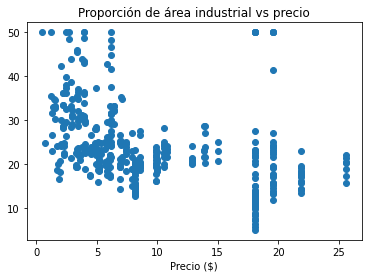

In [10]:
plt.scatter(df_train['industrial'], df_train['valor'])
plt.title("Proporción de área industrial vs precio")
plt.xlabel("Proporción de área industrial (%)")
plt.xlabel("Precio ($)")
plt.show()

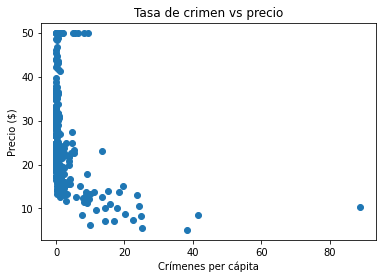

In [11]:
plt.scatter(df_train['tasa_crimen'], df_train['valor'])
plt.title("Tasa de crimen vs precio")
plt.xlabel("Crímenes per cápita")
plt.ylabel("Precio ($)")
plt.show()

### Gráficos de dispersión pairplot

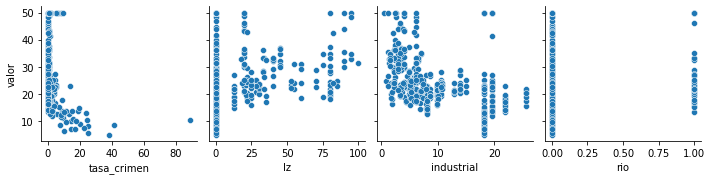

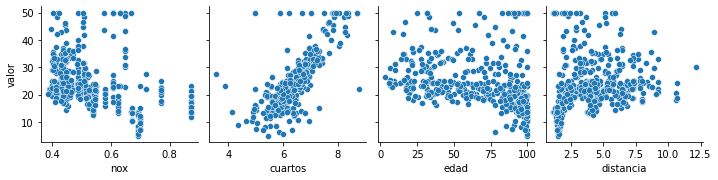

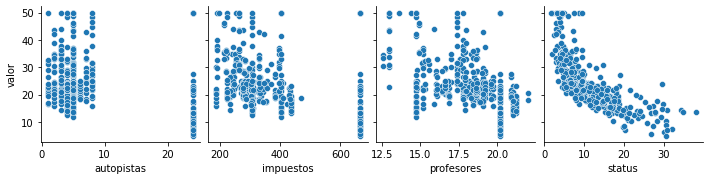

In [12]:
sns.pairplot(df_train, x_vars=['tasa_crimen', 'lz', 'industrial', 'rio'], y_vars=['valor'])
sns.pairplot(df_train, x_vars=['nox', 'cuartos', 'edad', 'distancia'], y_vars=['valor'])
sns.pairplot(df_train, x_vars=['autopistas', 'impuestos', 'profesores', 'status'], y_vars=['valor'])

Al agregar la opción _kind='reg'_, se agrega una línea de regresión al gráfico de dispersión, lo cual facilita ver la dirección de la correlación entre las variables.

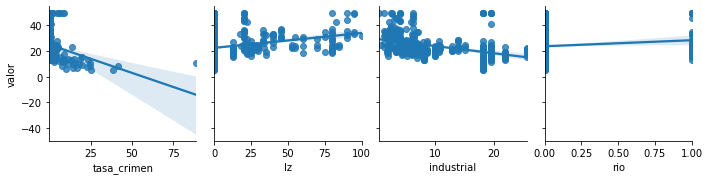

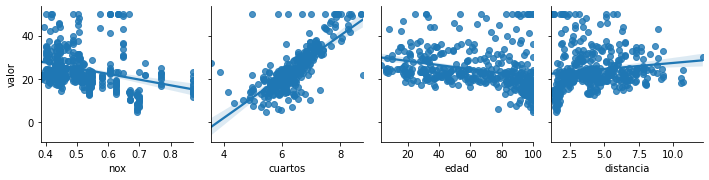

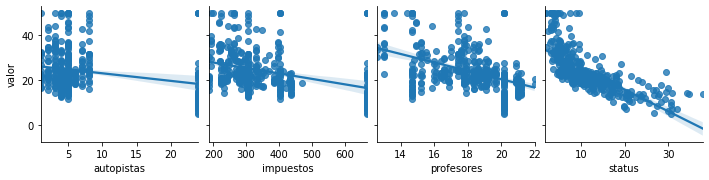

In [13]:
sns.pairplot(df_train, x_vars=['tasa_crimen', 'lz', 'industrial', 'rio'], y_vars=['valor'], kind="reg")
sns.pairplot(df_train, x_vars=['nox', 'cuartos', 'edad', 'distancia'], y_vars=['valor'], kind="reg")
sns.pairplot(df_train, x_vars=['autopistas', 'impuestos', 'profesores', 'status'], y_vars=['valor'], kind="reg")

## Heatmap

<AxesSubplot:>

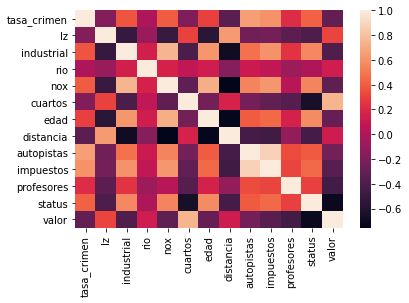

In [14]:
sns.heatmap(df_train.corr())

## Histogramas

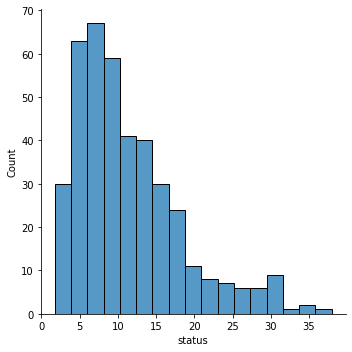

In [15]:
sns.displot(df_train, x="status")

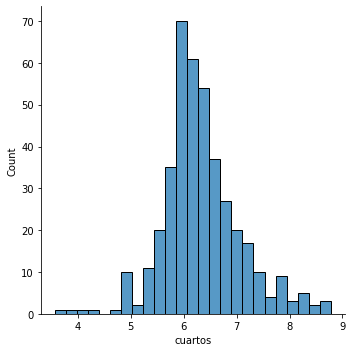

In [16]:
ax = sns.displot(df_train, x="cuartos", legend=False)


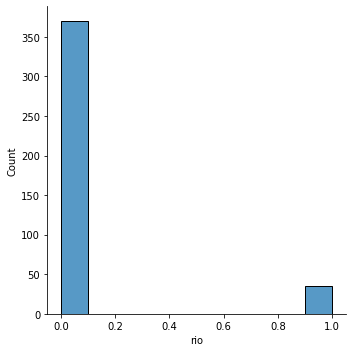

In [17]:
sns.displot(df_train, x="rio")

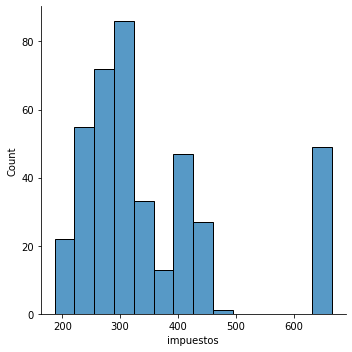

In [18]:
sns.displot(df_train, x="impuestos")

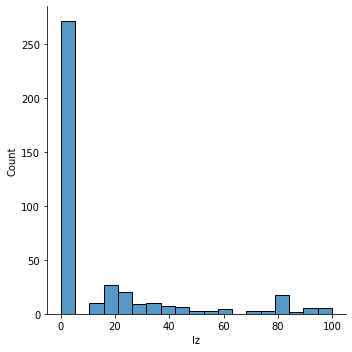

In [19]:
sns.displot(df_train, x="lz")

## Diagramas de cajas y bigotes

Text(0, 0.5, 'Rio')

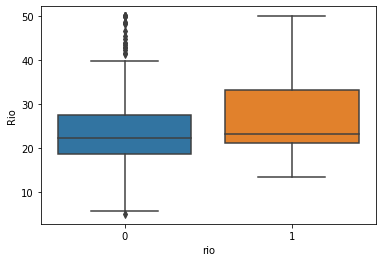

In [20]:
ax = sns.boxplot(x = df_train['rio'], y = df_train['valor'])
ax.set_ylabel('Valor ($)')
ax.set_ylabel('Rio')


<AxesSubplot:xlabel='autopistas', ylabel='valor'>

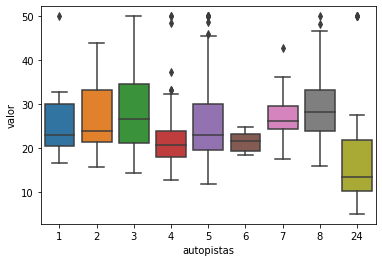

In [21]:
sns.boxplot(x = df_train['autopistas'], y = df_train['valor'])

# Modelo de regresión lineal univariada

In [22]:
linear_univ_mod = LinearRegression().fit(df_train[['status']], df_train[['valor']])

In [23]:
print("El intercepto de la regresión es {}. La pendiente de la regresión es {}.".format(round(linear_univ_mod.intercept_[0], 1), round(linear_univ_mod.coef_[0][0], 1)))

El intercepto de la regresión es 35.1. La pendiente de la regresión es -1.0.


In [24]:
df_test[['predicted_linear_univ']] = pd.DataFrame(linear_univ_mod.predict(df_test[['status']]))

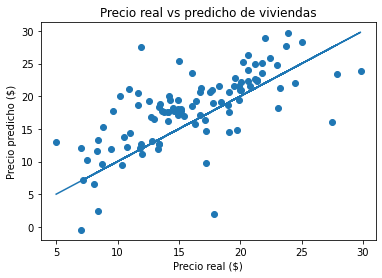

In [25]:
plt.scatter(df_test[['valor']], df_test[['predicted_linear_univ']])
plt.plot(df_test[['valor']], df_test[['valor']])
plt.title("Precio real vs predicho de viviendas")
plt.xlabel("Precio real ($)")
plt.ylabel("Precio predicho ($)")
plt.show()


In [26]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_univ']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_univ']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_univ']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.82
MAE = 3.75
MAPE = 0.28


# Regresión lineal con término cuadrático

In [27]:
df_train[['status_sq']] = df_train[['status']]*df_train[['status']]
linear_univ_mod_quad = LinearRegression().fit(df_train[['status', 'status_sq']], df_train[['valor']])

In [28]:
df_test[['status_sq']] = df_test[['status']]*df_test[['status']]
df_test[['predicted_linear_univ_sq']] = pd.DataFrame(linear_univ_mod_quad.predict(df_test[['status', 'status_sq']]))

In [29]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_univ_sq']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_univ_sq']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_univ_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.25
MAE = 3.1
MAPE = 0.24


# Regresión lineal multivariada

In [30]:
columnas = ['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad', 'distancia', 'autopistas', 'impuestos', 'profesores', 'status']

In [31]:
linear_multi_mod = LinearRegression().fit(df_train[columnas], df_train[['valor']])

In [32]:
df_test[['predicted_linear_multi']] = pd.DataFrame(linear_multi_mod.predict(df_test[columnas]))

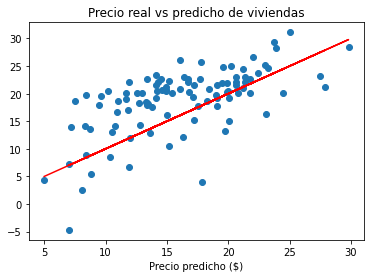

In [33]:
plt.scatter(df_test[['valor']], df_test[['predicted_linear_multi']])
plt.plot(df_test[['valor']], df_test[['valor']], color = 'red')
plt.title("Precio real vs predicho de viviendas")
plt.xlabel("Precio real ($)")
plt.xlabel("Precio predicho ($)")
plt.show()

In [34]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_multi']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_multi']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_multi']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 5.54
MAE = 4.58
MAPE = 0.35


# Regresión multivariada con término cuadrático

In [35]:
columnas_sq = ['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad', 'distancia', 'autopistas', 'impuestos', 'profesores', 'status', 'status_sq']

In [36]:
linear_multi_mod_sq = LinearRegression().fit(df_train[columnas_sq], df_train[['valor']])

In [37]:
df_test[['predicted_linear_multi_sq']] = pd.DataFrame(linear_multi_mod_sq.predict(df_test[columnas_sq]))

In [38]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_multi_sq']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_multi_sq']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_multi_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.4
MAE = 3.59
MAPE = 0.26


# Random forests

In [39]:
mod_random_for = RandomForestRegressor().fit(df_train[columnas], df_train[['valor']].values.ravel())

In [40]:
df_test[['predicted_random_for']] = pd.DataFrame(mod_random_for.predict(df_test[columnas]))

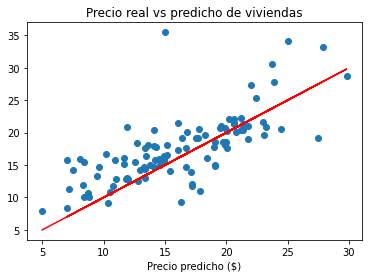

In [41]:
plt.scatter(df_test[['valor']], df_test[['predicted_random_for']])
plt.plot(df_test[['valor']], df_test[['valor']], color = 'red')
plt.title("Precio real vs predicho de viviendas")
plt.xlabel("Precio real ($)")
plt.xlabel("Precio predicho ($)")
plt.show()

In [42]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_random_for']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_random_for']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_random_for']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.15
MAE = 3.02
MAPE = 0.22


In [43]:
feature_importance_rf = pd.DataFrame({'variable':columnas, 'FI': mod_random_for.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
5,cuartos,0.587149
11,status,0.211750
7,distancia,0.076856
0,tasa_crimen,0.051271
9,impuestos,0.017298
10,profesores,0.014750
4,nox,0.013527
6,edad,0.011618
2,industrial,0.006781
8,autopistas,0.006104


# Random forests with quadratic term

In [44]:
columnas_sq = ['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad', 'distancia', 'autopistas', 'impuestos', 'profesores', 'status', 'status_sq']
mod_random_for_sq = RandomForestRegressor().fit(df_train[columnas_sq], df_train[['valor']].values.ravel())

In [45]:
df_test[['predicted_random_for_sq']] = pd.DataFrame(mod_random_for_sq.predict(df_test[columnas_sq]))

In [46]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_random_for_sq']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_random_for_sq']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_random_for_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.55
MAE = 3.33
MAPE = 0.24


In [47]:
feature_importance_rf = pd.DataFrame({'variable':columnas_sq, 'FI': mod_random_for_sq.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
5,cuartos,0.601640
11,status,0.102537
12,status_sq,0.097327
7,distancia,0.070709
0,tasa_crimen,0.050201
9,impuestos,0.019001
10,profesores,0.018739
6,edad,0.012734
4,nox,0.010442
2,industrial,0.008515


# Random forests - different parameters

In [48]:
mod_random_for_param = RandomForestRegressor(n_estimators = 350).fit(df_train[columnas], df_train[['valor']].values.ravel())

In [49]:
df_test[['predicted_random_for_param']] = pd.DataFrame(mod_random_for_param.predict(df_test[columnas]))

In [50]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_random_for_param']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_random_for_param']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_random_for_param']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.19
MAE = 3.08
MAPE = 0.23


In [51]:
feature_importance_rf = pd.DataFrame({'variable':columnas, 'FI': mod_random_for_param.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
5,cuartos,0.585693
11,status,0.212817
7,distancia,0.072371
0,tasa_crimen,0.052876
10,profesores,0.018659
9,impuestos,0.018138
6,edad,0.012209
4,nox,0.011821
2,industrial,0.007747
8,autopistas,0.005401
